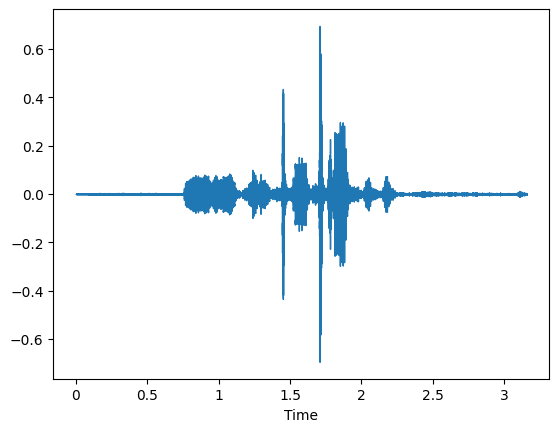

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import soundfile as sf

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

y, sr = librosa.load('/content/Lab1_voice.wav')
librosa.display.waveshow(y)

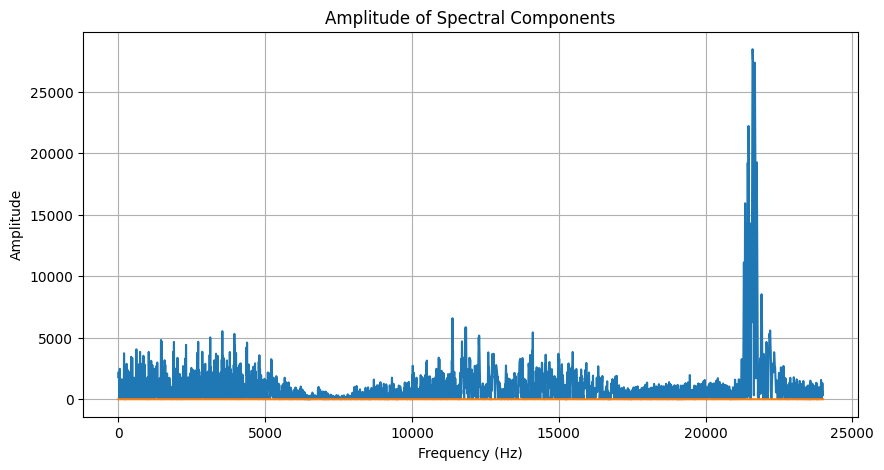

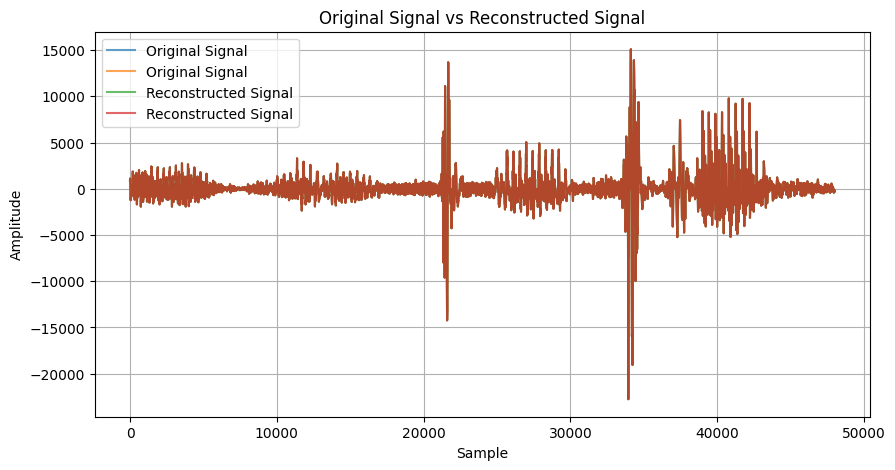

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sampling_rate, signal = wavfile.read('/content/Lab1_voice.wav')

# Take a segment of the signal
start_time = 1  # in seconds
end_time = 2  # in seconds
segment = signal[int(start_time * sampling_rate):int(end_time * sampling_rate)]

# FFT
fft_result = np.fft.fft(segment)

# Calculating the frequency axis
frequency_axis = np.fft.fftfreq(len(segment), 1/sampling_rate)

# Ploting amplitude part of the spectral components
plt.figure(figsize=(10, 5))
plt.plot(frequency_axis[:len(segment)//2], np.abs(fft_result)[:len(segment)//2])  # Only plot positive frequencies
plt.title('Amplitude of Spectral Components')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Inverse transform to get time domain signal
ifft_result = np.fft.ifft(fft_result)

# Ploting original signal and reconstructed signal
plt.figure(figsize=(10, 5))
plt.plot(segment, label='Original Signal', alpha=0.7)
plt.plot(np.real(ifft_result), label='Reconstructed Signal', alpha=0.7)
plt.title('Original Signal vs Reconstructed Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


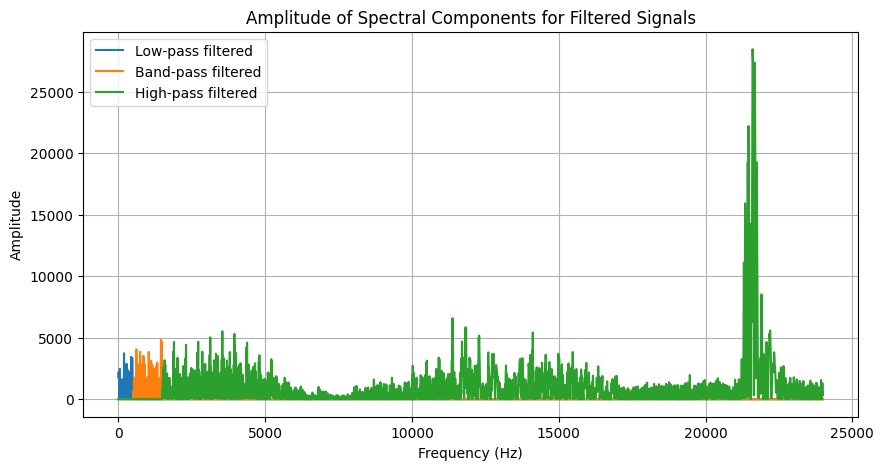

In [6]:
# Low-pass, band-pass, and high-pass filters
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sampling_rate, signal = wavfile.read('/content/Lab1_voice.wav')

start_time = 1  # in seconds
end_time = 2  # in seconds
segment = signal[int(start_time * sampling_rate):int(end_time * sampling_rate)]

# FFT
fft_result = np.fft.fft(segment)

# MonoAudio
fft_result_mono = fft_result[:, 0]

# Calculating the frequency axis
frequency_axis = np.fft.fftfreq(len(segment), 1/sampling_rate)

def lowpass_filter(frequency_axis, cutoff_freq):
    return np.where(np.abs(frequency_axis) <= cutoff_freq, 1, 0)

def bandpass_filter(frequency_axis, low_cutoff_freq, high_cutoff_freq):
    return np.where((np.abs(frequency_axis) >= low_cutoff_freq) & (np.abs(frequency_axis) <= high_cutoff_freq), 1, 0)

def highpass_filter(frequency_axis, cutoff_freq):
    return np.where(np.abs(frequency_axis) >= cutoff_freq, 1, 0)

# Applying filters
cutoff_freq_lp = 500  # Low-pass cutoff frequency in Hz
cutoff_freq_bp_low = 500  # Band-pass low cutoff frequency in Hz
cutoff_freq_bp_high = 1500  # Band-pass high cutoff frequency in Hz
cutoff_freq_hp = 1500  # High-pass cutoff frequency in Hz

lp_filtered_spectrum = fft_result_mono * lowpass_filter(frequency_axis, cutoff_freq_lp)
bp_filtered_spectrum = fft_result_mono * bandpass_filter(frequency_axis, cutoff_freq_bp_low, cutoff_freq_bp_high)
hp_filtered_spectrum = fft_result_mono * highpass_filter(frequency_axis, cutoff_freq_hp)

# Inverse transform to get time domain signals
lp_filtered_signal = np.fft.ifft(lp_filtered_spectrum).real.astype(np.int16)
bp_filtered_signal = np.fft.ifft(bp_filtered_spectrum).real.astype(np.int16)
hp_filtered_signal = np.fft.ifft(hp_filtered_spectrum).real.astype(np.int16)

# Plot amplitude part of the spectral components for each filtered signal
plt.figure(figsize=(10, 5))
plt.plot(frequency_axis[:len(segment)//2], np.abs(lp_filtered_spectrum)[:len(segment)//2], label='Low-pass filtered')
plt.plot(frequency_axis[:len(segment)//2], np.abs(bp_filtered_spectrum)[:len(segment)//2], label='Band-pass filtered')
plt.plot(frequency_axis[:len(segment)//2], np.abs(hp_filtered_spectrum)[:len(segment)//2], label='High-pass filtered')
plt.title('Amplitude of Spectral Components for Filtered Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


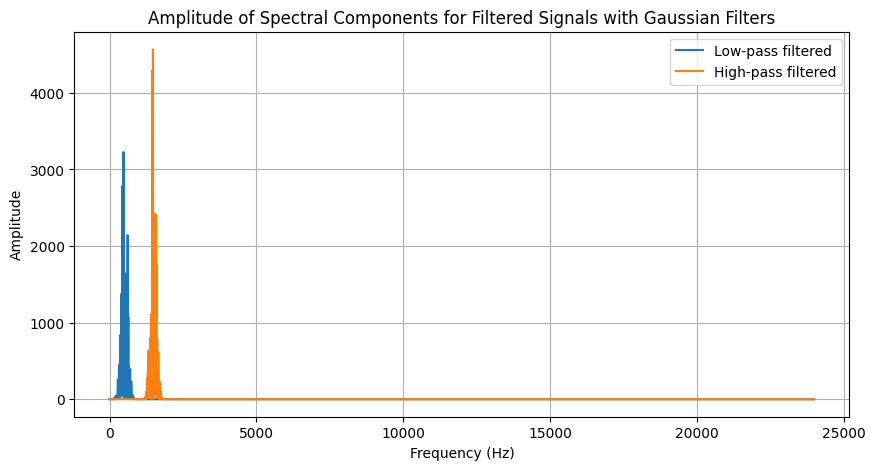

In [7]:
#Gaussian Filter
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sampling_rate, signal = wavfile.read('/content/Lab1_voice.wav')

start_time = 1  # in seconds
end_time = 2  # in seconds
segment = signal[int(start_time * sampling_rate):int(end_time * sampling_rate)]

# FFT
fft_result = np.fft.fft(segment)

# MonoAudio
fft_result_mono = fft_result[:, 0]

# Calculating the frequency axis
frequency_axis = np.fft.fftfreq(len(segment), 1/sampling_rate)

def gaussian_filter(frequency_axis, center_freq, sigma):
    return np.exp(-(frequency_axis - center_freq)**2 / (2 * sigma**2))

# Applying filters
center_freq_lp = 500  # Center frequency for low-pass filter in Hz
sigma_lp = 100  # Standard deviation for low-pass filter

center_freq_hp = 1500  # Center frequency for high-pass filter in Hz
sigma_hp = 100  # Standard deviation for high-pass filter

lp_filtered_spectrum = fft_result_mono * gaussian_filter(frequency_axis, center_freq_lp, sigma_lp)
hp_filtered_spectrum = fft_result_mono * gaussian_filter(frequency_axis, center_freq_hp, sigma_hp)

# Inverse transform to get time domain signals
lp_filtered_signal = np.fft.ifft(lp_filtered_spectrum).real.astype(np.int16)
hp_filtered_signal = np.fft.ifft(hp_filtered_spectrum).real.astype(np.int16)

# Plot amplitude part of the spectral components for each filtered signal
plt.figure(figsize=(10, 5))
plt.plot(frequency_axis[:len(segment)//2], np.abs(lp_filtered_spectrum)[:len(segment)//2], label='Low-pass filtered')
plt.plot(frequency_axis[:len(segment)//2], np.abs(hp_filtered_spectrum)[:len(segment)//2], label='High-pass filtered')
plt.title('Amplitude of Spectral Components for Filtered Signals with Gaussian Filters')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


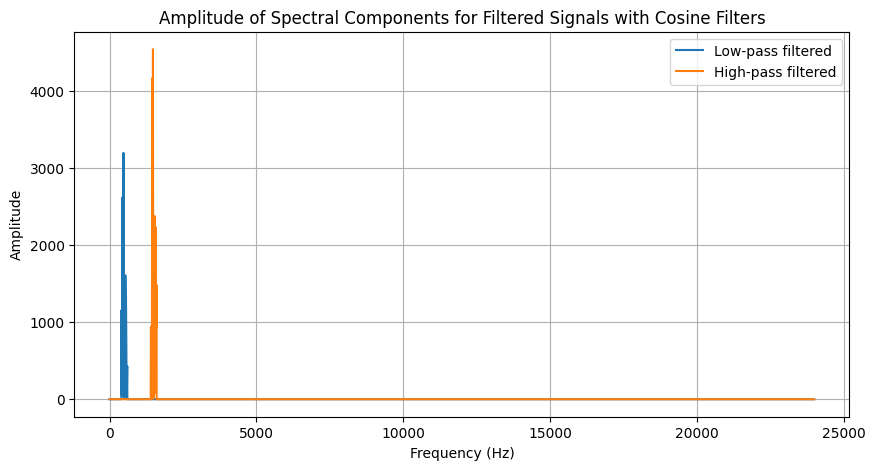

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sampling_rate, signal = wavfile.read('/content/Lab1_voice.wav')

start_time = 1  # in seconds
end_time = 2  # in seconds
segment = signal[int(start_time * sampling_rate):int(end_time * sampling_rate)]

# FFT
fft_result = np.fft.fft(segment)

# MonoAudio
fft_result_mono = fft_result[:, 0]

# Calculating the frequency axis
frequency_axis = np.fft.fftfreq(len(segment), 1/sampling_rate)

def cosine_filter(frequency_axis, center_freq, bandwidth):
    return np.where(np.abs(frequency_axis - center_freq) <= bandwidth/2, 0.5 * (1 + np.cos((np.abs(frequency_axis) - center_freq) * np.pi / bandwidth)), 0)

# Applying filters
center_freq_lp = 500  # Center frequency for low-pass filter in Hz
bandwidth_lp = 200  # Bandwidth for low-pass filter

center_freq_hp = 1500  # Center frequency for high-pass filter in Hz
bandwidth_hp = 200  # Bandwidth for high-pass filter

lp_filtered_spectrum = fft_result_mono * cosine_filter(frequency_axis, center_freq_lp, bandwidth_lp)
hp_filtered_spectrum = fft_result_mono * cosine_filter(frequency_axis, center_freq_hp, bandwidth_hp)

# Inverse transform to get time domain signals
lp_filtered_signal = np.fft.ifft(lp_filtered_spectrum).real.astype(np.int16)
hp_filtered_signal = np.fft.ifft(hp_filtered_spectrum).real.astype(np.int16)

# Plot amplitude part of the spectral components for each filtered signal
plt.figure(figsize=(10, 5))
plt.plot(frequency_axis[:len(segment)//2], np.abs(lp_filtered_spectrum)[:len(segment)//2], label='Low-pass filtered')
plt.plot(frequency_axis[:len(segment)//2], np.abs(hp_filtered_spectrum)[:len(segment)//2], label='High-pass filtered')
plt.title('Amplitude of Spectral Components for Filtered Signals with Cosine Filters')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
